GCN無向圖

In [1]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

In [2]:
# define graph(adjacent matrix), nodes number is 4
A = np.array(
    [
        [0, 1, 0, 1],
        [1, 0, 1, 1], 
        [0, 1, 0, 1],
        [1, 1, 1, 0]
    ],
    dtype=float
    )
print(A)

[[0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]]


/Users/czw/miniconda3/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


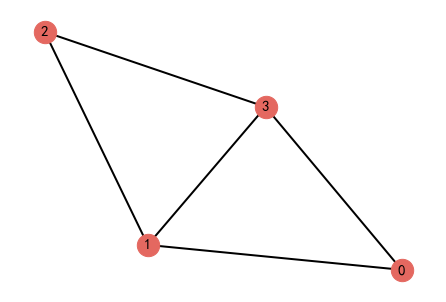

In [3]:
# draw graph
G = nx.Graph(A)
nx.draw(G, node_size=500, node_color='#e46860', font_size=15, width=2, arrowsize=20, with_labels=True)
plt.show()

In [4]:
# define input, format is [4,2]
X = np.array(
    [
        [i, -i]
        for i in range(A.shape[0])
    ], 
    dtype=float
    )
print(X)

[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


In [5]:
# propagate
F = A.dot(X)
print(F)

[[ 4. -4.]
 [ 5. -5.]
 [ 4. -4.]
 [ 3. -3.]]


GCN有向圖

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]


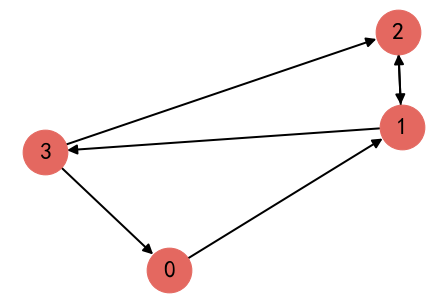

In [6]:
# define graph(adjacent matrix), nodes number is 4
A = np.array(
    [
        [0, 1, 0, 0],
        [0, 0, 1, 1], 
        [0, 1, 0, 0],
        [1, 0, 1, 0]
    ],
    dtype=float
    )
print(A)

# draw graph
G = nx.DiGraph(A)
nx.draw(G, node_size=2000, node_color='#e46860', font_size=24, width=2, arrowsize=20, with_labels=True)
plt.show()

In [7]:
# propagate
F = A.dot(X)
print(F)

[[ 1. -1.]
 [ 5. -5.]
 [ 1. -1.]
 [ 2. -2.]]


GCN無向圖+自己迴圈

In [8]:
# define graph(adjacent matrix), nodes number is 4
A = np.array(
    [
        [0, 1, 0, 0],
        [0, 0, 1, 1], 
        [0, 1, 0, 0],
        [1, 0, 1, 0]
    ],
    dtype=float
    )
print(A)

# add self-loop
I = np.array(np.eye(A.shape[0]))
A_hat = A + I
print(A_hat)

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]


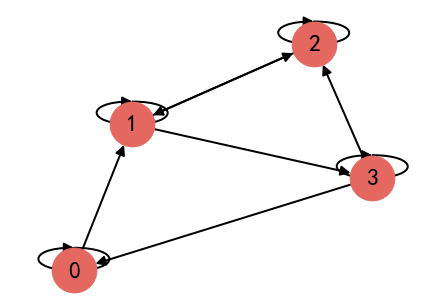

In [9]:
# draw graph
G = nx.DiGraph(A_hat)
nx.draw(G, node_size=2000, node_color='#e46860', font_size=24, width=2, arrowsize=20, with_labels=True)
plt.show()

In [10]:
# define weight matrix
W = np.array(
    [
        [1, -1],
        [-1, 1]
    ]
    )
print(W)

[[ 1 -1]
 [-1  1]]


In [11]:
# compute degree matrix
D_hat = np.sum(A_hat, axis=0)
print(D_hat)

[2. 3. 3. 2.]


In [12]:
X = np.array(
    [
        [i, -i]
        for i in range(A.shape[0])
    ], 
    dtype=float
    )
print(X)

[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


In [13]:
# propagate
D_hat = np.diag(D_hat**-0.5)
Z = (((D_hat.dot(A_hat)).dot(D_hat)).dot(X)).dot(W)
print(Z)

[[ 0.81649658 -0.81649658]
 [ 4.44948974 -4.44948974]
 [ 2.         -2.        ]
 [ 4.63299316 -4.63299316]]
